<a href="https://colab.research.google.com/github/suurii/PreProject/blob/master/MultiNN_humen_action_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import lib


In [ ]:
# for analyzing
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
import datetime

# for check file
from pathlib import Path
import numpy as np
import tensorflow as tf

# Download Data from csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = ['sit.csv','stand_facing.csv','stand_back.csv','stand_with_left_hand.csv','stand_with_right_hand.csv']
folder = '/content/drive/My Drive/data_prepj/'

if Path(folder+filename[0]).is_file():
  sit = pd.read_csv(folder+filename[0],header=0)
  stand_facing = pd.read_csv(folder+filename[1],header=0)
  stand_back = pd.read_csv(folder+filename[2],header=0)
  stand_with_left_hand = pd.read_csv(folder+filename[3],header=0)
  stand_with_right_hand = pd.read_csv(folder+filename[4],header=0)
else:
  print('something wrong with reading file')

user = pd.concat([sit,stand_facing,stand_back,stand_with_left_hand,stand_with_right_hand])



In [ ]:
user

,nose_x,nose_y,nose,nose_score,leftEye_x,leftEye_y,leftEye,leftEye_score,rightEye_x,rightEye_y,rightEye,rightEye_score,leftEar_x,leftEar_y,leftEar,leftEar_score,rightEar_x,rightEar_y,rightEar,rightEar_score,leftShoulder_x,leftShoulder_y,leftShoulder,leftShoulder_score,rightShoulder_x,rightShoulder_y,rightShoulder,rightShoulder_score,leftElbow_x,leftElbow_y,leftElbow,leftElbow_score,rightElbow_x,rightElbow_y,rightElbow,rightElbow_score,leftWrist_x,leftWrist_y,leftWrist,leftWrist_score,rightWrist_x,rightWrist_y,rightWrist,rightWrist_score,leftHip_x,leftHip_y,leftHip,leftHip_score,rightHip_x,rightHip_y,rightHip,rightHip_score,leftKnee_x,leftKnee_y,leftKnee,leftKnee_score,rightKnee_x,rightKnee_y,rightKnee,rightKnee_score,leftAnkle_x,leftAnkle_y,leftAnkle,leftAnkle_score,rightAnkle_x,rightAnkle_y,rightAnkle,rightAnkle_score,label
0,510.423614,354.982544,0.441327,0.997995,530.888245,345.962341,0.521214,0.999144,489.405457,345.160828,0.476446,0.998524,559.627686,366.199982,0.520734,0.953082,459.459442,361.759979,0.417598,0.956912,585.249756,441.820251,0.5,0.575246,390.627045,434.079254,0.5,0.800547,573.291443,534.876770,0.663073,0.819031,341.761780,518.921814,0.857932,0.934027,495.634979,598.265991,0.824026,0.862165,384.590302,574.410706,0.878850,0.831289,575.373596,563.511536,0.785543,0.682865,412.282806,576.234070,0.809272,0.485060,660.680603,667.580811,1.475282,0.247771,317.664917,661.454163,1.442553,0.534042,400.518250,628.182495,1.074862,0.131996,374.328430,644.483643,1.210202,0.082294,sit
1,478.372681,376.369354,0.390877,0.991627,492.581390,363.325745,0.482435,0.999147,457.986023,362.786163,0.481997,0.999517,521.627136,375.327667,0.490539,0.988272,440.097748,374.121094,0.452581,0.970053,556.422241,440.493072,0.5,0.707440,391.390106,440.951050,0.5,0.729836,567.144653,532.099609,0.791054,0.900886,377.409546,517.267029,0.746334,0.828635,512.168091,587.001648,0.916187,0.852349,456.124908,587.178955,0.893958,0.947299,564.770752,570.514038,0.960034,0.641713,396.531555,566.225464,0.893386,0.459743,656.615601,657.536133,1.718042,0.679887,631.856262,663.431274,1.654424,0.420543,453.565613,593.800354,0.935716,0.077290,202.596924,592.195923,1.882837,0.058291,sit
2,473.002472,377.916840,0.337688,0.987445,494.251007,363.764343,0.440777,0.998955,457.099762,362.119202,0.432252,0.999373,522.814026,377.909515,0.453837,0.989379,432.454102,371.678131,0.427067,0.989051,557.357544,436.346069,0.5,0.702780,381.190369,438.239685,0.5,0.695929,567.447082,537.395874,0.795840,0.909195,378.139099,516.042603,0.683660,0.880770,511.172028,588.689758,0.891644,0.744785,454.145142,587.184326,0.855121,0.935729,556.093262,571.119629,0.905461,0.565062,379.581482,567.375305,0.896863,0.479592,344.763153,652.616455,1.411822,0.413105,336.563080,651.343750,1.429543,0.645777,453.086945,593.908752,0.893703,0.085019,203.274536,591.922424,1.746413,0.076367,sit
3,425.235107,409.409943,0.368052,0.997912,433.812927,397.851379,0.445048,0.999572,398.947876,396.839966,0.512382,0.999354,457.807007,411.885559,0.387087,0.974753,377.378479,415.512634,0.507120,0.786709,504.121307,455.833252,0.5,0.655743,362.324554,466.428467,0.5,0.898976,561.434143,507.526337,0.958897,0.982966,345.246857,573.330872,1.002718,0.801994,567.293884,586.484375,1.290820,0.973928,360.803436,608.753662,1.156391,0.348485,508.802643,556.192261,0.854094,0.787781,405.663696,548.660950,0.645368,0.473458,493.419495,649.990478,1.394038,0.541235,412.531738,647.904846,1.321569,0.948248,403.808502,762.413086,2.128914,0.519887,413.799194,771.339661,2.185891,0.622056,sit
4,434.954315,409.390900,0.386001,0.998298,444.523987,398.370392,0.481046,0.999636,409.635437,398.763000,0.475968,0.998653,465.677948,412.443756,0.460520,0.977463,390.993256,410.147919,0.457828,0.847234,494.084686,456.527069,0.5,0.793607,358.923920,465.451538,0.5,0.859116,552.475525,500.414154,0.974467,0.890713,342.750824,547.304199,0.887897,0.878334,551.885803,590.759277,1.332147,0.972904,342.289490,589.358887,1.133425,0.776709,496.813660,556.773438,0.877

# Preprocess Data


- Cleaning Data

In [ ]:
#drop duplicate interpolate and rolling data
user_d = user.drop_duplicates()
user_d = user_d.interpolate(method='linear')
# user_d.iloc[:,0:67] = user_d.iloc[:,0:67].rolling(3).mean()

# user2_drop = user2.drop_duplicates()
# user2_drop = user2_drop.interpolate(method='linear')
# user2_drop.iloc[:,0:67] = user2_drop.iloc[:,0:67].rolling(3).mean()

# user2_drop = user2_drop.dropna(axis=0)
user_d = user_d.dropna(axis=0)
user_d = user_d.reset_index(drop=True)
# user2_drop = user2_drop.reset_index(drop=True)

In [ ]:
# user = pd.concat([user1_drop,user2_drop])
# user
user_d['label']

0                         sit
1                         sit
2                         sit
3                         sit
4                         sit
                ...          
1368    stand_with_right_hand
1369    stand_with_right_hand
1370    stand_with_right_hand
1371    stand_with_right_hand
1372    stand_with_right_hand
Name: label, Length: 1373, dtype: object

In [ ]:
# user_all = user_d.iloc[:,0:68].copy()
# user_all

- Normolize data

In [ ]:
# norm = preprocessing.StandardScaler() 
# bin_encoder = preprocessing.LabelBinarizer()

# user_norm_ratio = pd.DataFrame(norm.fit_transform(user.iloc[:,[2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66]]))  #norm ratio data
# user_norm_coordinates = pd.DataFrame(norm.fit_transform(user.iloc[:,[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32,33,36,37,40,41,44,45,48,49,52,53,56,57,60,61,64,65]]))
# user_norm_score = pd.DataFrame(norm.fit_transform(user.iloc[:,[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67]]))
# user_label = bin_encoder.fit_transform(user['label'])
# user_label[:,1]

user_norm_ratio = user_d.iloc[:,[2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62,66]].copy()  #norm ratio data
user_norm_score = user_d.iloc[:,[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67]].copy()
user_norm_ratio

,nose,leftEye,rightEye,leftEar,rightEar,leftShoulder,rightShoulder,leftElbow,rightElbow,leftWrist,rightWrist,leftHip,rightHip,leftKnee,rightKnee,leftAnkle,rightAnkle
0,0.441327,0.521214,0.476446,0.520734,0.417598,0.5,0.5,0.663073,0.857932,0.824026,0.878850,0.785543,0.809272,1.475282,1.442553,1.074862,1.210202
1,0.390877,0.482435,0.481997,0.490539,0.452581,0.5,0.5,0.791054,0.746334,0.916187,0.893958,0.960034,0.893386,1.718042,1.654424,0.935716,1.882837
2,0.337688,0.440777,0.432252,0.453837,0.427067,0.5,0.5,0.795840,0.683660,0.891644,0.855121,0.905461,0.896863,1.411822,1.429543,0.893703,1.746413
3,0.368052,0.445048,0.512382,0.387087,0.507120,0.5,0.5,0.958897,1.002718,1.290820,1.156391,0.854094,0.645368,1.394038,1.321569,2.128914,2.185891
4,0.386001,0.481046,0.475968,0.460520,0.457828,0.5,0.5,0.974467,0.887897,1.332147,1.133425,0.877185,0.816190,1.431826,1.356860,2.234194,2.260909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0.401181,0.483803,0.500039,0.537619,0.502418,0.5,0.5,0.872131,1.308001,1.283912,1.830184,1.110631,2.126392,1.836231,1.836255,2.757041,2.901628
1369,0.429442,0.513594,0.541310,0.528726,0.556627,0.5,0.5,0.903223,1.409759,1.329837,1.935891,1.236370,1.513041,1.917586,1.912517,2.561487,2.463791
1370,0.411459,0.480570,0.530583,0.508266,0.550768,0.5,0.5,0.916542,1.379204,1.947440,1.970233,1.369752,1.545936,2.059487,1.981703,1.387473,2.664004
1371,0.405034,0.489538,0.510845,0.538598,0.517718,0.5,0.5,0.897779,1.306333,1.871595,1.895578,1.430602,1.164528,1.882287,1.882017,2.465684,2.463397


In [ ]:
# user_norm_ratio.columns = ['nose', 'leftEye','rightEye','leftEar','rightEar','leftShoulder','rightShoulder','leftElbow','rightElbow','leftWrist','rightWrist','leftHip','rightHip','leftKnee','rightKnee','leftAnkle','rightAnkle',]

In [ ]:
user_norm_ratio

,nose,leftEye,rightEye,leftEar,rightEar,leftShoulder,rightShoulder,leftElbow,rightElbow,leftWrist,rightWrist,leftHip,rightHip,leftKnee,rightKnee,leftAnkle,rightAnkle
0,0.441327,0.521214,0.476446,0.520734,0.417598,0.5,0.5,0.663073,0.857932,0.824026,0.878850,0.785543,0.809272,1.475282,1.442553,1.074862,1.210202
1,0.390877,0.482435,0.481997,0.490539,0.452581,0.5,0.5,0.791054,0.746334,0.916187,0.893958,0.960034,0.893386,1.718042,1.654424,0.935716,1.882837
2,0.337688,0.440777,0.432252,0.453837,0.427067,0.5,0.5,0.795840,0.683660,0.891644,0.855121,0.905461,0.896863,1.411822,1.429543,0.893703,1.746413
3,0.368052,0.445048,0.512382,0.387087,0.507120,0.5,0.5,0.958897,1.002718,1.290820,1.156391,0.854094,0.645368,1.394038,1.321569,2.128914,2.185891
4,0.386001,0.481046,0.475968,0.460520,0.457828,0.5,0.5,0.974467,0.887897,1.332147,1.133425,0.877185,0.816190,1.431826,1.356860,2.234194,2.260909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0.401181,0.483803,0.500039,0.537619,0.502418,0.5,0.5,0.872131,1.308001,1.283912,1.830184,1.110631,2.126392,1.836231,1.836255,2.757041,2.901628
1369,0.429442,0.513594,0.541310,0.528726,0.556627,0.5,0.5,0.903223,1.409759,1.329837,1.935891,1.236370,1.513041,1.917586,1.912517,2.561487,2.463791
1370,0.411459,0.480570,0.530583,0.508266,0.550768,0.5,0.5,0.916542,1.379204,1.947440,1.970233,1.369752,1.545936,2.059487,1.981703,1.387473,2.664004
1371,0.405034,0.489538,0.510845,0.538598,0.517718,0.5,0.5,0.897779,1.306333,1.871595,1.895578,1.430602,1.164528,1.882287,1.882017,2.465684,2.463397


In [ ]:
# user_norm_coordinates.columns = ['nose_x','nose_y','leftEye_x','leftEye_y','rightEye_x','rightEye_y','leftEar_x','leftEar_y','rightEar_x','rightEar_y','leftShoulder_x','leftShoulder_y','rightShoulder_x','rightShoulder_y','leftElbow_x','leftElbow_y','rightElbow_x','rightElbow_y','leftWrist_x','leftWrist_y','rightWrist_x','rightWrist_y','leftHip_x','leftHip_y','rightHip_x','rightHip_y','leftKnee_x','leftKnee_y','rightKnee_x','rightKnee_y','leftAnkle_x','leftAnkle_y','rightAnkle_x','rightAnkle_y']

In [ ]:
# user_norm_coordinates

In [ ]:
# user_norm_score.columns = ['nose_score','leftEye_score','rightEye_score','leftEar_score','rightEar_score','leftShoulder_score','rightShoulder_score','leftElbow_score','rightElbow_score','leftWrist_score','rightWrist_score','leftHip_score','rightHip_score','leftKnee_score','rightKnee_score','leftAnkle_score','rightAnkle_score']

In [ ]:
user_norm_score

,nose_score,leftEye_score,rightEye_score,leftEar_score,rightEar_score,leftShoulder_score,rightShoulder_score,leftElbow_score,rightElbow_score,leftWrist_score,rightWrist_score,leftHip_score,rightHip_score,leftKnee_score,rightKnee_score,leftAnkle_score,rightAnkle_score
0,0.997995,0.999144,0.998524,0.953082,0.956912,0.575246,0.800547,0.819031,0.934027,0.862165,0.831289,0.682865,0.485060,0.247771,0.534042,0.131996,0.082294
1,0.991627,0.999147,0.999517,0.988272,0.970053,0.707440,0.729836,0.900886,0.828635,0.852349,0.947299,0.641713,0.459743,0.679887,0.420543,0.077290,0.058291
2,0.987445,0.998955,0.999373,0.989379,0.989051,0.702780,0.695929,0.909195,0.880770,0.744785,0.935729,0.565062,0.479592,0.413105,0.645777,0.085019,0.076367
3,0.997912,0.999572,0.999354,0.974753,0.786709,0.655743,0.898976,0.982966,0.801994,0.973928,0.348485,0.787781,0.473458,0.541235,0.948248,0.519887,0.622056
4,0.998298,0.999636,0.998653,0.977463,0.847234,0.793607,0.859116,0.890713,0.878334,0.972904,0.776709,0.785312,0.486642,0.929768,0.852898,0.662165,0.648144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0.995770,0.998515,0.999709,0.985128,0.964464,0.532430,0.536739,0.961563,0.440813,0.776407,0.403533,0.347438,0.190437,0.734092,0.796469,0.358969,0.254776
1369,0.992755,0.997999,0.999315,0.988567,0.951749,0.523140,0.374904,0.962923,0.506156,0.762517,0.259169,0.247800,0.437407,0.462502,0.690672,0.136087,0.135674
1370,0.998646,0.999432,0.999749,0.991970,0.963622,0.536106,0.624752,0.966932,0.273729,0.881698,0.280218,0.162234,0.135307,0.321141,0.410369,0.050055,0.055650
1371,0.998469,0.999266,0.999636,0.992709,0.958181,0.438975,0.635395,0.988079,0.360009,0.763378,0.535270,0.147542,0.229485,0.591336,0.546243,0.106065,0.111144


- Label encoding

In [ ]:
bin_encoder = preprocessing.LabelBinarizer()

user_label = bin_encoder.fit(np.array(user_d['label']))
user_label = pd.DataFrame(bin_encoder.transform(np.array(user_d['label'])))


In [ ]:
user_label

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1368,0,0,0,0,1
1369,0,0,0,0,1
1370,0,0,0,0,1
1371,0,0,0,0,1


In [ ]:
# from keras.utils import to_categorical    # similar to one-hot encoding

# user_labels = to_categorical(user_label)


In [ ]:
user_label.columns = ['sit','stand_facing','stand_back','stand_with_left_hand','stand_with_right_hand']
user_label

,sit,stand_facing,stand_back,stand_with_left_hand,stand_with_right_hand
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1368,0,0,0,0,1
1369,0,0,0,0,1
1370,0,0,0,0,1
1371,0,0,0,0,1


- merge data

In [ ]:
# #merge all column
# user_norm = pd.merge(user_norm_ratio,user_norm_coordinates,left_index=True,right_index=True)
user_norm = pd.merge(user_norm_ratio,user_norm_score,left_index=True,right_index=True)
user_norm = pd.merge(user_norm,user_label,left_index=True,right_index=True)

In [ ]:
user_norm.shape

(1373, 39)

In [ ]:
import plotly.graph_objects as go

from plotly.offline import iplot

data = [
        go.Scatter(y=user_norm['nose'], name='nose',mode='markers',marker=dict(colorscale='Viridis')),
        go.Scatter(y=user_norm['leftEye'], name='leftEye',mode='markers',marker=dict(colorscale='Viridis')),
        go.Scatter(y=user_norm['rightEye'], name='rightEye',mode='markers',marker=dict(colorscale='Viridis')),
        go.Scatter(y=user_norm['leftEar'], name='leftEar',mode='markers',marker=dict(colorscale='Viridis')),
]

layout = go.Layout(title='data')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Time seseries 

In [ ]:
t_step = 5
t_stride = 3
data_slide = []

for i in range(0,user_norm.shape[0]-t_step,t_stride):
  data_slide.append(user_norm.iloc[i:i+t_step,:].values)
data_slide = np.array(data_slide)

data_slide.shape

(456, 5, 39)

In [ ]:
data_slide

array([[[0.44132675, 0.5212141 , 0.47644596, ..., 0.        ,
         0.        , 0.        ],
        [0.39087705, 0.48243476, 0.48199702, ..., 0.        ,
         0.        , 0.        ],
        [0.33768806, 0.4407774 , 0.43225242, ..., 0.        ,
         0.        , 0.        ],
        [0.36805227, 0.44504761, 0.51238237, ..., 0.        ,
         0.        , 0.        ],
        [0.38600054, 0.48104573, 0.47596777, ..., 0.        ,
         0.        , 0.        ]],

       [[0.36805227, 0.44504761, 0.51238237, ..., 0.        ,
         0.        , 0.        ],
        [0.38600054, 0.48104573, 0.47596777, ..., 0.        ,
         0.        , 0.        ],
        [0.37911502, 0.46834151, 0.43272528, ..., 0.        ,
         0.        , 0.        ],
        [0.42787684, 0.49010822, 0.44655959, ..., 0.        ,
         0.        , 0.        ],
        [0.4364025 , 0.48897702, 0.50168008, ..., 0.        ,
         0.        , 0.        ]],

       [[0.42787684, 0.49010822, 0.4

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_slide[:,:,0:34] , data_slide[:, 4, 34:39], test_size=0.2, random_state=77, stratify = data_slide[:, 4,34:39] )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(364, 5, 34)
(92, 5, 34)
(364, 5)
(92, 5)


# Train Model

- import libraly

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import datasets, layers, models,optimizers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# cnn model
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

- defind model CNN

In [ ]:
# def evaluate_model(trainX, trainy, testX, testy):
trainX, trainy, testX, testy = X_train,y_train, X_test , y_test
verbose, epochs, batch_size = 2,80, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = models.Sequential()
model.add(layers.Conv1D(filters=128, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features),padding='same'))
model.add(layers.Conv1D(filters=64, kernel_size=4, activation='relu',padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Dropout(0.5))

model.add(layers.Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps,n_features),padding='same'))
model.add(layers.Conv1D(filters=32, kernel_size=4, activation='relu',padding='same'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)

# evaluate model
# _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
# return accuracy

Train on 364 samples
Epoch 1/80
364/364 - 0s - loss: 1.6680 - acc: 0.2363
Epoch 2/80
364/364 - 0s - loss: 1.4825 - acc: 0.3132
Epoch 3/80
364/364 - 0s - loss: 1.4296 - acc: 0.4231
Epoch 4/80
364/364 - 0s - loss: 1.3417 - acc: 0.4203
Epoch 5/80
364/364 - 0s - loss: 1.3886 - acc: 0.4423
Epoch 6/80
364/364 - 0s - loss: 1.3151 - acc: 0.4478
Epoch 7/80
364/364 - 0s - loss: 1.2335 - acc: 0.4560
Epoch 8/80
364/364 - 0s - loss: 1.1530 - acc: 0.5220
Epoch 9/80
364/364 - 0s - loss: 1.1396 - acc: 0.5385
Epoch 10/80
364/364 - 0s - loss: 1.0342 - acc: 0.5797
Epoch 11/80
364/364 - 0s - loss: 0.9803 - acc: 0.5879
Epoch 12/80
364/364 - 0s - loss: 0.9436 - acc: 0.6181
Epoch 13/80
364/364 - 0s - loss: 0.8312 - acc: 0.6511
Epoch 14/80
364/364 - 0s - loss: 0.7997 - acc: 0.6731
Epoch 15/80
364/364 - 0s - loss: 0.7694 - acc: 0.6758
Epoch 16/80
364/364 - 0s - loss: 0.7268 - acc: 0.6676
Epoch 17/80
364/364 - 0s - loss: 0.7568 - acc: 0.6841
Epoch 18/80
364/364 - 0s - loss: 0.7525 - acc: 0.7060
Epoch 19/80
364/

In [ ]:
# def summarize_results(scores):
# 	print(scores)
# 	m, s = mean(scores), std(scores)
# 	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# # run an experiment
# def run_experiment(repeats=10):
# 	# load data
# 	trainX, trainy, testX, testy = X_train,y_train, X_test , y_test
# 	# repeat experiment
# 	scores = list()
# 	for r in range(repeats):
# 		score = evaluate_model(trainX, trainy, testX, testy)
# 		score = score * 100.0
# 		print('>#%d: %.3f' % (r+1, score))
# 		scores.append(score)
# 	# summarize results
# 	summarize_results(scores)
 
# # run the experiment
# run_experiment()

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.82      0.96      0.88        24
           2       0.92      0.55      0.69        22
           3       0.64      0.90      0.75        10
           4       0.73      1.00      0.84         8

    accuracy                           0.83        92
   macro avg       0.81      0.85      0.81        92
weighted avg       0.85      0.83      0.82        92



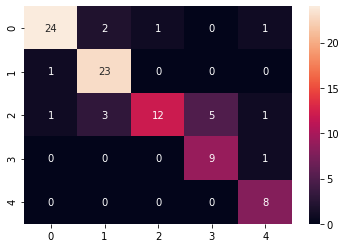

In [ ]:
y_predict_CNN = model.predict(X_test)
y_pred_single_CNN = [np.argmax(p) for p in y_predict_CNN]
y_test_single_CNN = [np.argmax(p) for p in y_test]


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(classification_report(y_test_single_CNN, y_pred_single_CNN))
sns.heatmap(confusion_matrix(y_test_single_CNN, y_pred_single_CNN),annot=True)

['sit','stand_facing','stand_back','stand_with_left_hand','stand_with_right_hand']

In [ ]:
y_predict_CNN


array([[1.80491697e-04, 5.51327503e-07, 9.99768794e-01, 4.11018191e-05,
        9.01687508e-06],
       [4.85182391e-05, 9.99921918e-01, 2.09072150e-05, 9.64112878e-09,
        8.75676415e-06],
       [4.54049405e-05, 7.79419770e-06, 9.95358527e-01, 4.10734583e-03,
        4.80907067e-04],
       [2.37285853e-08, 1.00000000e+00, 1.00783506e-08, 2.27742680e-14,
        1.26686253e-08],
       [9.99995112e-01, 3.76473857e-08, 4.86285899e-06, 6.22430102e-12,
        1.00984575e-10],
       [5.26399745e-05, 1.38241536e-04, 6.38553058e-04, 3.54330568e-03,
        9.95627284e-01],
       [1.66140831e-06, 9.84172956e-08, 9.98343110e-01, 1.65068731e-03,
        4.45260866e-06],
       [2.12333434e-05, 9.48980141e-06, 5.56571841e-01, 4.43299115e-01,
        9.82975980e-05],
       [3.20971631e-05, 2.56508383e-06, 9.89896297e-01, 1.00167179e-02,
        5.22857408e-05],
       [9.99999642e-01, 7.39433688e-12, 3.38201744e-07, 2.40080372e-17,
        5.88325199e-15],
       [1.51970964e-02, 8.8854

In [ ]:
#import os
#save_dir = os.path.join(os.getcwd(), 'saved_models') # save model 
# model_name = 'model.h5' # filename of saved model
#if not os.path.isdir(save_dir):
#   os.makedirs(save_dir)
#model_path = os.path.join(save_dir, model_name)
#model.save(model_path)
#print('Saved trained model at %s ' % model_path)

export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)


INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

377640

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#del model

In [ ]:
# Restore model from model_path
# from keras.models import load_model
#import tensorflow as tf 
#model = tf.keras.models.load_model(model_path)

In [ ]:
#scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.184514512186465
Test accuracy: 0.8152174


In [ ]:
try :
  %tensorfloe_verdion 2.x
except :
  pass 

In [ ]:
npm install node-media-server --save

In [ ]:
#server/app.js

const node_media_server = require('./media_server');

node_media_server.run();